In [2]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline




num_of_points = 201
h = 1 / (num_of_points - 1)
num_of_elements = num_of_points - 1
N = 3 * num_of_elements  # global size of matrixes
x = np.linspace(0, 1, num_of_points)
X = np.linspace(0, 1, N)

exact_solution = np.zeros(num_of_points)
K_j = np.zeros((4, 4))  # local
M_j = np.zeros((4, 4))  # local
K = np.zeros([N, N])  # global
M = np.zeros([N, N])  # global
matr = np.zeros([N, N])  # K+M
I = np.zeros(N)


# exact solution
def solution(x):
    return (x+25*math.pi*math.pi/4)*np.cos(5*math.pi*x/2) 


















In [3]:
for i in np.arange(num_of_points):
    exact_solution[i] = solution(x[i])
#matrix filling
K_j[0][0] = K_j[3][3] = 1.85
K_j[0][1] = K_j[1][0] = K_j[3][2] = K_j[2][3] = -2.3625
K_j[1][1] = K_j[2][2] = 5.4
K_j[0][2] = K_j[2][0] = K_j[3][1] = K_j[1][3] = 0.675
K_j[0][3] = K_j[3][0] = -0.1625
K_j[1][2] = K_j[2][1] = -3.7125

M_j[0][0] = M_j[3][3] = 16 / 105
M_j[0][1] = M_j[1][0] = M_j[3][2] = M_j[2][3] = 33 / 280
M_j[1][1] = M_j[2][2] = 27 / 35
M_j[0][2] = M_j[2][0] = M_j[3][1] = M_j[1][3] = -3 / 70
M_j[0][3] = M_j[3][0] = 19 / 840
M_j[1][2] = M_j[2][1] = -27 / 280

for i in np.arange(4):
    for k in np.arange(4):
        K_j[i][k] = K_j[i][k] * 2 / h
        M_j[i][k] = M_j[i][k] * 5 * h
        K[i][k] = K_j[i][k]
        M[i][k] = M_j[i][k]

for s in range(3 * num_of_elements - 3):
    if (s % 3 == 0):
        M[2 + s:6 + s, 2 + s:6 + s] += M_j
        K[2 + s:6 + s, 2 + s:6 + s] += K_j
ind = 0
for i in range(num_of_elements - 1):
    I[ind] = f2(x[i], x[i + 1])
    I[ind + 1] = f3(x[i], x[i + 1])
    I[ind + 2] = f4(x[i], x[i + 1]) + f1(x[i], x[i + 1])
    ind += 3

for i in range(N):
    I[i] = I[i] * h / 2

for i in range(N):
    for k in range(N):
        matr[i][k] = K[i][k] + M[i][k]
vect = np.linalg.solve(matr, I)
print(I)
print(M_j)


[1.85056948e-05 7.40203245e-05 3.08414991e-05 1.11027148e-04
 1.66528080e-04 9.25168876e-05 2.03521207e-04 2.58994748e-04
 1.54169449e-04 2.95965050e-04 3.51397512e-04 2.15783971e-04
 3.88335868e-04 4.43713575e-04 2.77345252e-04 4.80610870e-04
 5.35920157e-04 3.38838102e-04 5.72767289e-04 6.27994510e-04
 4.00247349e-04 6.64782386e-04 7.19913914e-04 4.61557841e-04
 7.56633458e-04 8.11655690e-04 5.22754450e-04 8.48297841e-04
 9.03197202e-04 5.83822078e-04 9.39752920e-04 9.94515864e-04
 6.44745656e-04 1.03097613e-03 1.08558914e-03 7.05510152e-04
 1.12194496e-03 1.17639457e-03 7.66100575e-04 1.21263697e-03
 1.26690974e-03 8.26501974e-04 1.30302978e-03 1.35711232e-03
 8.86699446e-04 1.39310108e-03 1.44698005e-03 9.46678138e-04
 1.48282866e-03 1.53649076e-03 1.00642325e-03 1.57219037e-03
 1.62562237e-03 1.06592004e-03 1.66116417e-03 1.71435287e-03
 1.12515384e-03 1.74972810e-03 1.80266039e-03 1.18411002e-03
 1.83786031e-03 1.89052312e-03 1.24277403e-03 1.92553906e-03
 1.97791940e-03 1.301131

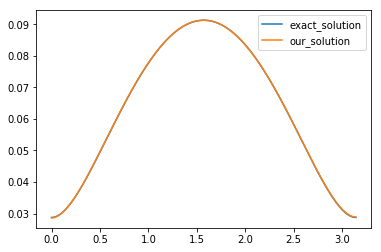

In [6]:
plt.plot(x, solution(x), label="exact_solution")
plt.plot(X, vect, label="our_solution")
plt.legend()